In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [94]:
data = pd.read_csv("data/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1. Exploratory Data Analysis
- Better understand the data
- Build intuition about the data
- Generate hypotheses
- Exploring anonymized data

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Checking for missing values

In [96]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Cleaning data

#### fill null values in reviews_per_month by 0

In [97]:
data["reviews_per_month"].fillna(0, inplace=True)

#### Remove unnecessary columns

In [98]:
data.drop(["id", "name", "host_name", "host_id", "last_review"], axis=1, inplace=True)

In [99]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [100]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,40.73,-73.95,152.72,7.03,23.27,1.09,7.14,112.78
std,0.05,0.05,240.15,20.51,44.55,1.60,32.95,131.62
min,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,40.69,-73.98,69.00,1.00,1.00,0.04,1.00,0.00
50%,40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


### 2. Data Visualization
- Visualize your data and search for pattern that can help you solve your problem.
- Correlation analysis helps us to see features relatations.

In [101]:
numeric_features = data.select_dtypes(include=["int64","float64"]).columns
categorical_features = data.select_dtypes(include=["object"]).columns
print(numeric_features)
print("================================================")
print(categorical_features)

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


### 2.1 Visualize numeric features

In [102]:
def draw_plot(data, val, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols)
    aux = 0
    fig.set_figheight(17)
    fig.set_figwidth(25)
    for row in axes:
        for col in row:
            sns.histplot(data, x=val[aux], ax=col)
            col.set_title(val[aux] +" Distribution",fontsize=16,fontweight="bold")
            aux+=1

#### Removing Outliers

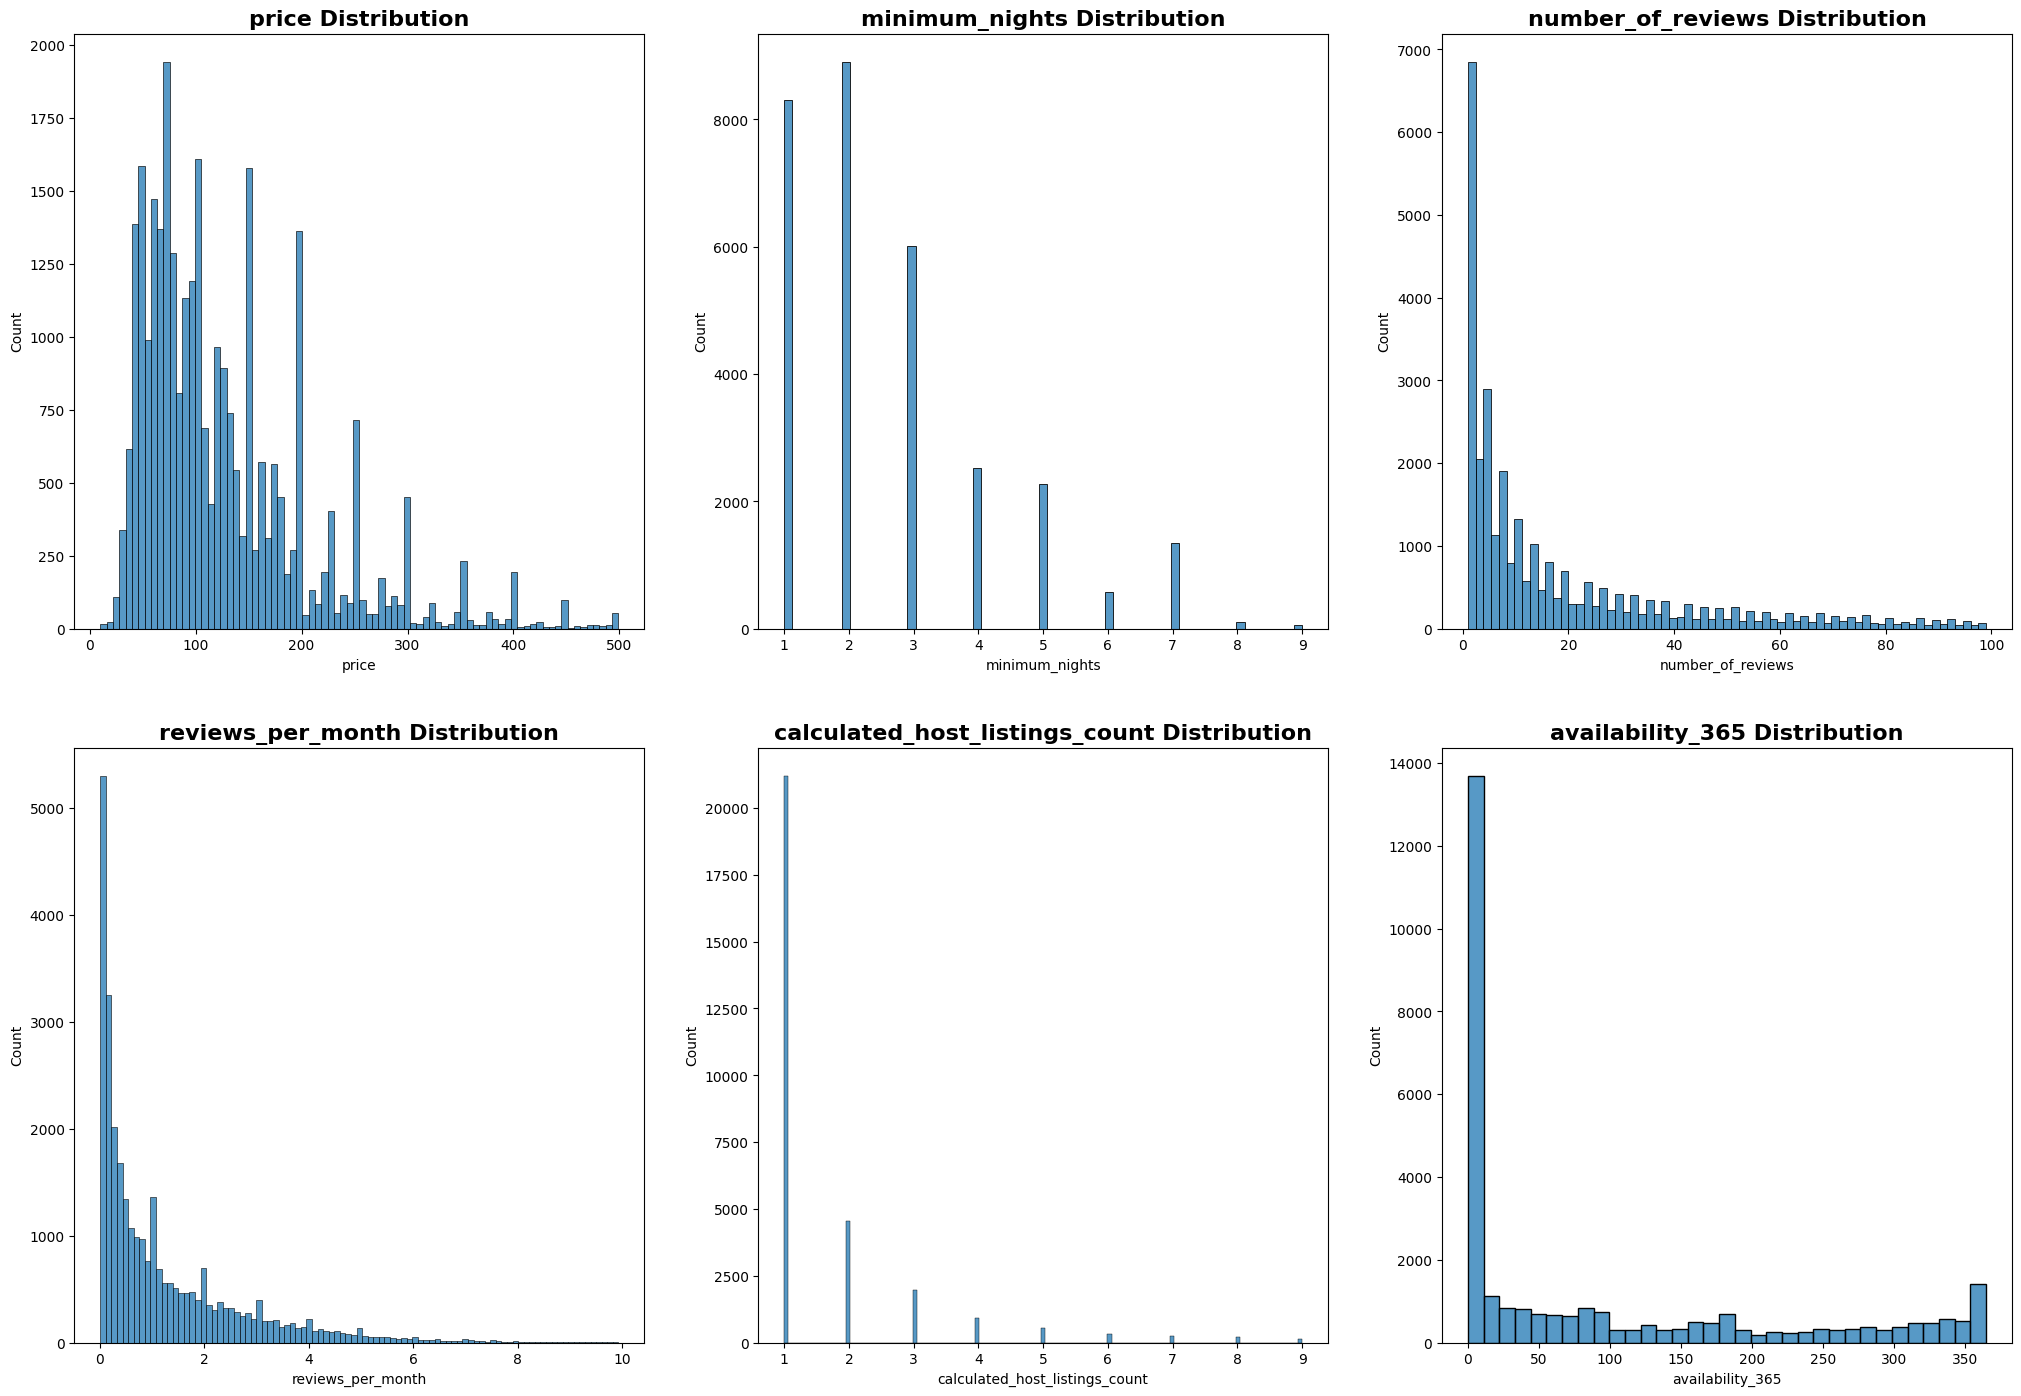

In [103]:
data = data[data["price"]>0]
data = data[data["price"]<500]
data = data[data["minimum_nights"]<10]
data = data[data["number_of_reviews"]>0]
data = data[data["number_of_reviews"]<100]
data = data[data["reviews_per_month"]>0]
data = data[data["reviews_per_month"]<10]
data = data[data["calculated_host_listings_count"]<10]

draw_plot(data, numeric_features.drop(["latitude","longitude"]), 2, 3)

<AxesSubplot: >

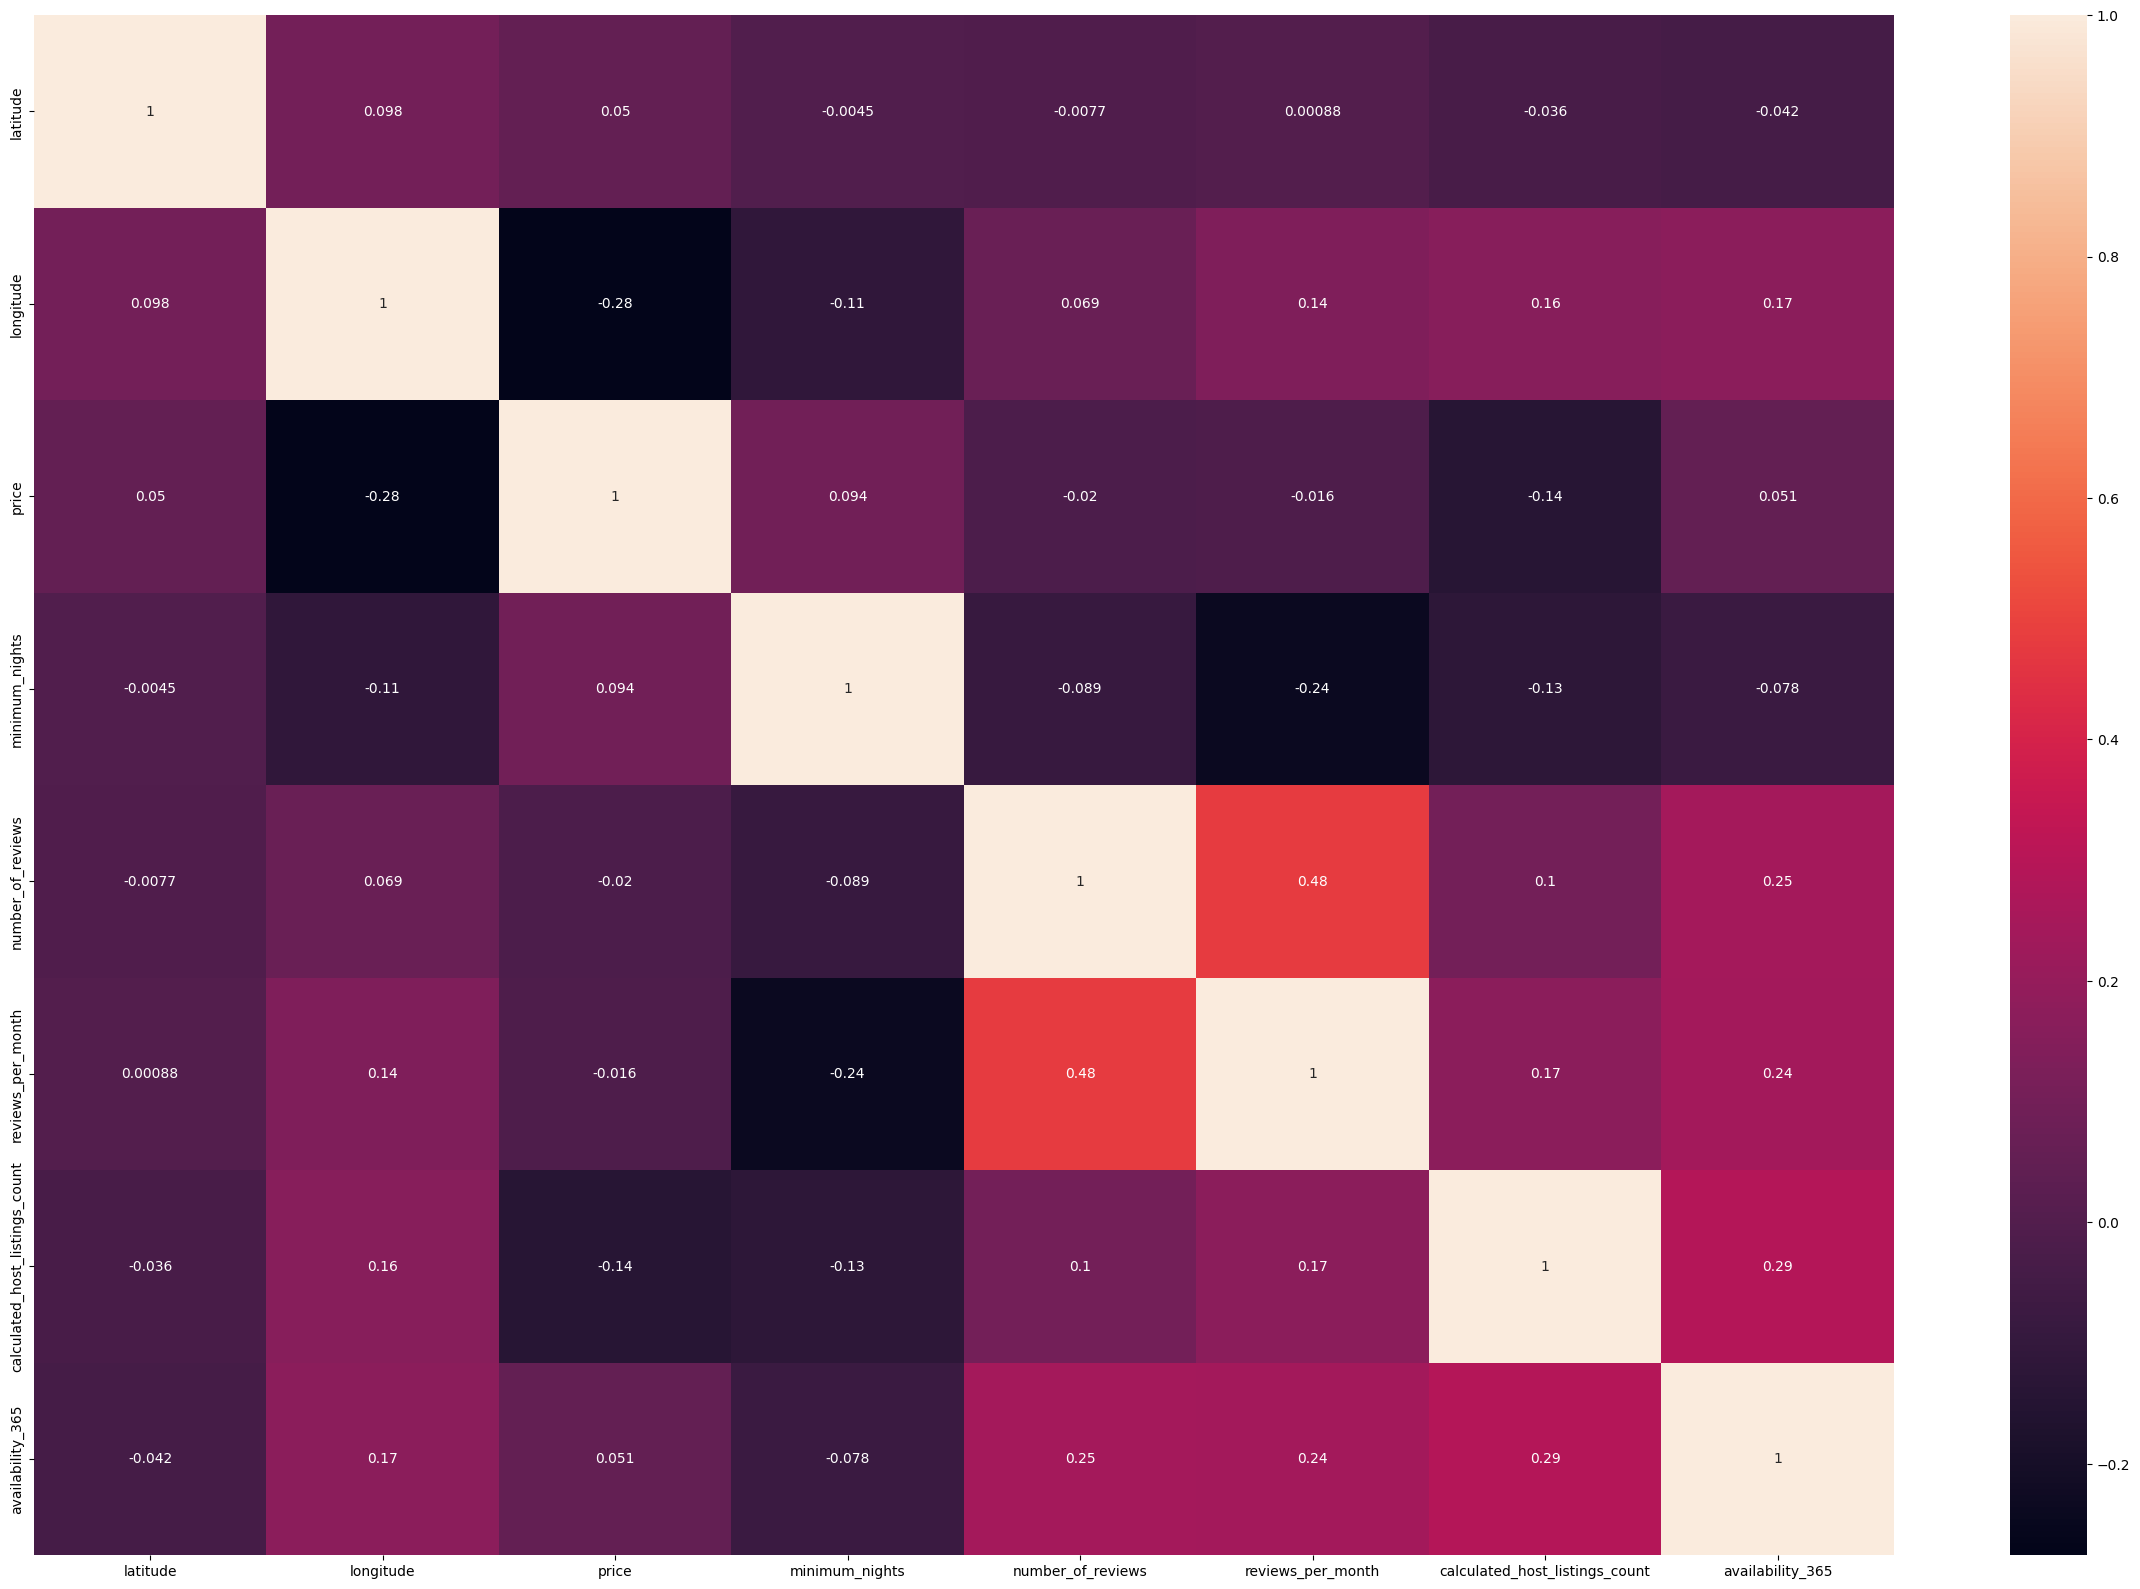

In [104]:
plt.figure(figsize=(30, 20))
sns.heatmap(data[numeric_features].corr(), annot=True)

### 2.2 Visualize categorical features

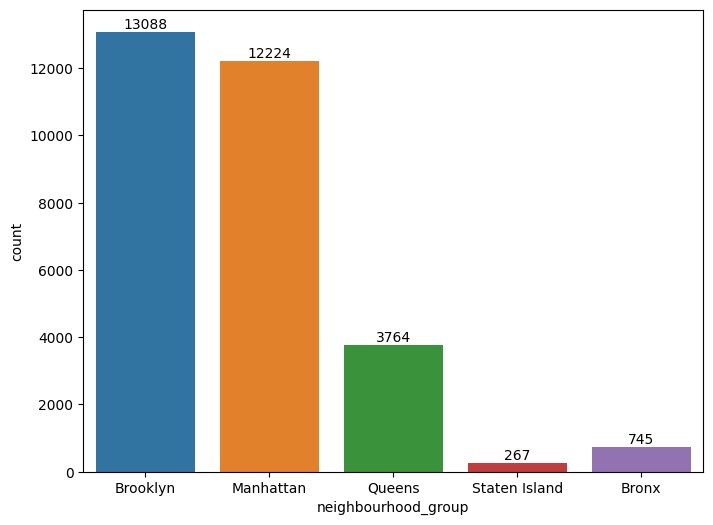

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="neighbourhood_group", data=data)
ax.bar_label(ax.containers[0], fontsize=10);

In [106]:
fig = px.scatter(data, x="longitude", y="latitude",
                 color="neighbourhood_group", width=1000, height=800) 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

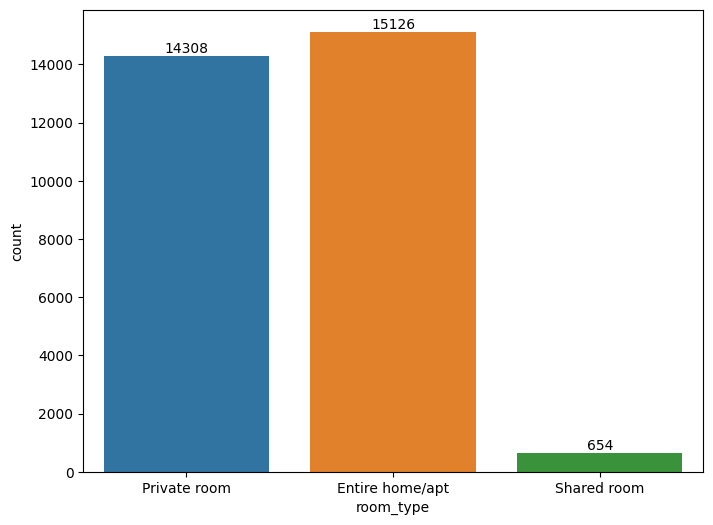

In [107]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="room_type", data=data)
ax.bar_label(ax.containers[0], fontsize=10);

<BarContainer object of 10 artists>

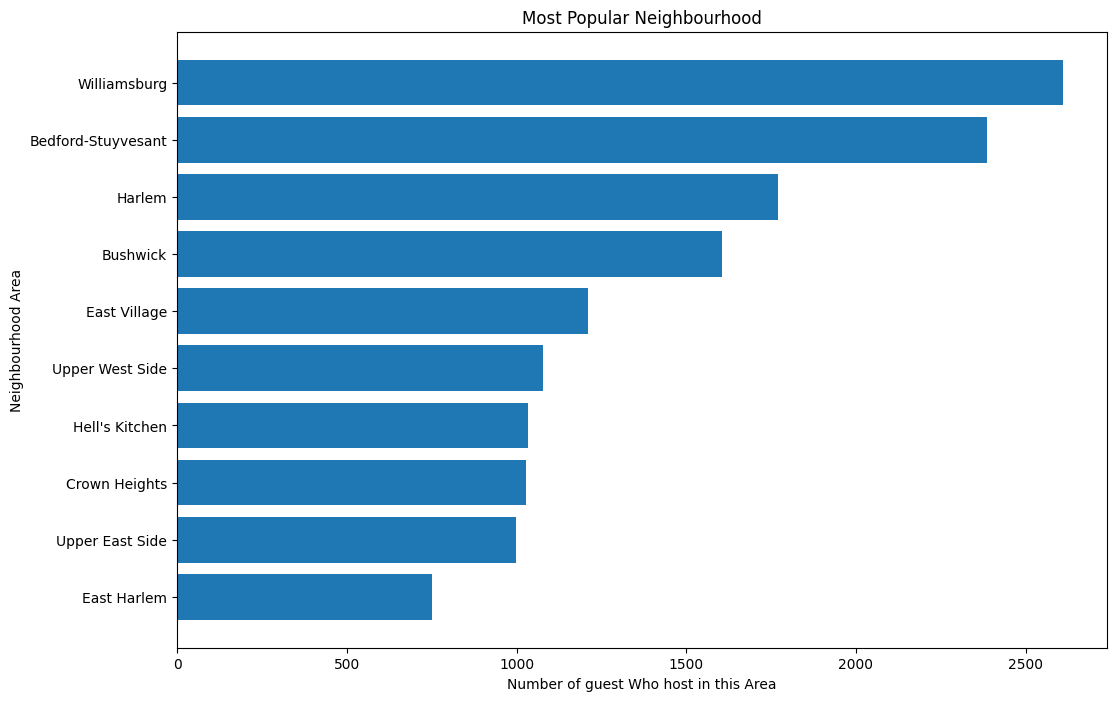

In [108]:
df_nbh = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df_nbh.index)
y = list(df_nbh.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

<Figure size 3000x800 with 0 Axes>

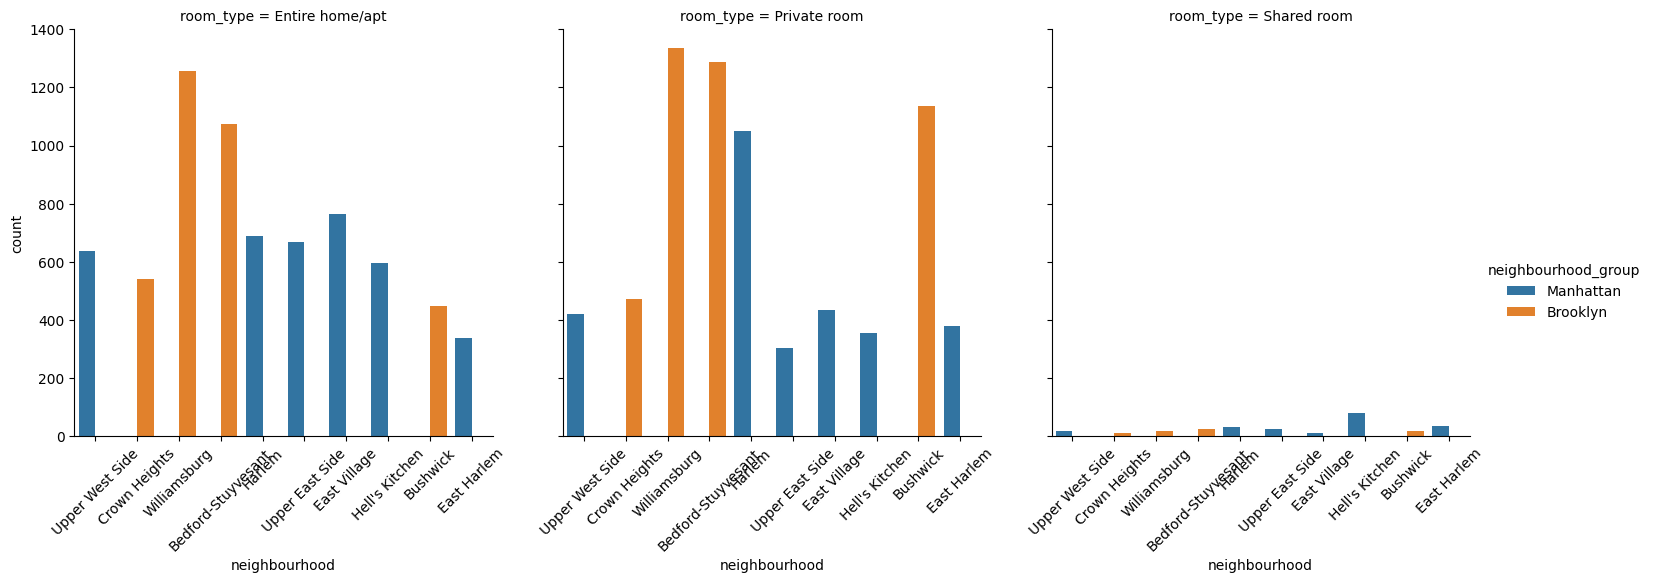

In [109]:
plt.figure(figsize=(30, 8))
df_tmp = data.loc[data["neighbourhood"].isin(data.neighbourhood.value_counts()[:10].index)]
sns.catplot(x="neighbourhood", hue="neighbourhood_group", col="room_type",
            data=df_tmp, kind="count").set_xticklabels(rotation=45)

### 3. Feature engineering

In [115]:
feature_columns = ["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

In [116]:
feature_data = data[feature_columns]
feature_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129
10,Manhattan,Upper West Side,Entire home/apt,135,5,53,0.43,1,6
18,Brooklyn,Crown Heights,Entire home/apt,99,3,53,4.44,1,21


#### Encoding categorical variables

In [117]:
data["room_type"] = data["room_type"].factorize()[0]
data["neighbourhood_group"] = data["neighbourhood_group"].factorize()[0]
data["neighbourhood"] = data["neighbourhood"].factorize()[0]
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,40.65,-73.97,0,149,1,9,0.21,6,365
1,1,1,40.75,-73.98,1,225,1,45,0.38,2,355
5,1,2,40.75,-73.97,1,200,3,74,0.59,1,129
10,1,3,40.80,-73.97,1,135,5,53,0.43,1,6
18,0,4,40.68,-73.95,1,99,3,53,4.44,1,21


### 4. Model Building

In [118]:
X = data[feature_columns]
y = data.calculated_host_listings_count

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=47)

In [119]:
def print_evaluate(flg, true, predicted):
    if flg == "train":
        print("=======Training results=======")
    elif flg == "test":
        print("=======Testing results=======")
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print("RMSE:", rmse)
    print("R2 Square", r2_square)

#### Linear Regression

In [120]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [121]:
print_evaluate("train", y_train, lin_reg.predict(X_train))
print_evaluate("test", y_test, lin_reg.predict(X_test))

=======Training results=======
RMSE: 1.9537989503692478e-14
R2 Square 1.0
=======Testing results=======
RMSE: 1.9584793774912745e-14
R2 Square 1.0


#### Decision Tree Regressor

In [122]:
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [123]:
print_evaluate("train", y_train, DTree.predict(X_train))
print_evaluate("test", y_test, DTree.predict(X_test))

=======Training results=======
RMSE: 0.0
R2 Square 1.0
=======Testing results=======
RMSE: 0.0
R2 Square 1.0


#### Random forest Regressor

In [124]:
regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)

RandomForestClassifier()

In [125]:
print_evaluate("train", y_train, regressor.predict(X_train))
print_evaluate("test", y_test, regressor.predict(X_test))

=======Training results=======
RMSE: 0.0
R2 Square 1.0
=======Testing results=======
RMSE: 0.08977280136954692
R2 Square 0.9953415336230477
